In [ ]:
import pandas as pd
import numpy as np
from numpy import unique
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
dt1 = pd.read_csv('clustered_data.csv')
dt1

,Unnamed: 0,race,age,engnat,gender,hand,source,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,0,3,53,1,1,1,1,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5,2
1,1,13,46,1,2,1,1,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2,3
2,2,1,14,2,2,1,1,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5,0
3,3,3,19,2,2,1,1,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5,0
4,4,11,25,2,2,1,2,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,19714,11,15,1,2,1,2,1,4,3,5,4,3,1,2,1,5,5,3,5,3,4,5,4,4,4,4,5,5,1,5,1,5,1,1,5,5,3,2,5,3,3,3,4,3,4,4,1,3,5,3,4,1,4,2,5,3,3
19715,19715,3,37,1,2,1,2,2,3,2,3,2,3,2,4,4,4,2,4,2,4,3,2,2,2,2,2,2,3,2,4,2,4,2,3,3,3,3,3,4,2,2,4,4,2,3,3,1,2,3,2,3,3,4,2,3,3,3
19716,19716,5,16,2,1,1,2,2,5,4,5,5,5,1,2,1,5,5,1,5,1,5,5,5,5,5,5,4,3,5,2,5,5,2,4,1,3,2,5,5,5,4,5,1,4,1,5,5,3,1,3,4,1,1,5,5,5,4
19717,19717,12,16,1,1,1,5,1,4,2,3,2,4,1,3,4,5,4,3,5,2,4,4,4,4,4,4,3,3,2,4,2,4,2,5,4,3,5,3,5,2,4,2,5,1,3,5,3,2,5,3,4,1,5,3,5,5,4


In [ ]:
dt1.drop('Unnamed: 0',axis=1,inplace=True)
dt1

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,3,53,1,1,1,1,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5,2
1,13,46,1,2,1,1,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2,3
2,1,14,2,2,1,1,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5,0
3,3,19,2,2,1,1,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5,0
4,11,25,2,2,1,2,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,1,4,3,5,4,3,1,2,1,5,5,3,5,3,4,5,4,4,4,4,5,5,1,5,1,5,1,1,5,5,3,2,5,3,3,3,4,3,4,4,1,3,5,3,4,1,4,2,5,3,3
19715,3,37,1,2,1,2,2,3,2,3,2,3,2,4,4,4,2,4,2,4,3,2,2,2,2,2,2,3,2,4,2,4,2,3,3,3,3,3,4,2,2,4,4,2,3,3,1,2,3,2,3,3,4,2,3,3,3
19716,5,16,2,1,1,2,2,5,4,5,5,5,1,2,1,5,5,1,5,1,5,5,5,5,5,5,4,3,5,2,5,5,2,4,1,3,2,5,5,5,4,5,1,4,1,5,5,3,1,3,4,1,1,5,5,5,4
19717,12,16,1,1,1,5,1,4,2,3,2,4,1,3,4,5,4,3,5,2,4,4,4,4,4,4,3,3,2,4,2,4,2,5,4,3,5,3,5,2,4,2,5,1,3,5,3,2,5,3,4,1,5,3,5,5,4


In [ ]:
pip install skfeature-chappers

In [ ]:
X = dt1.iloc[:,:-1]
Y= dt1['cluster']

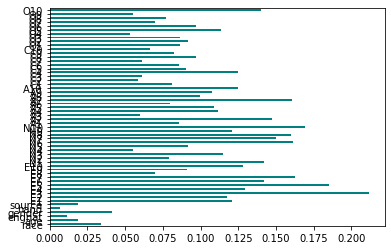

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,Y)
feat_importance = pd.Series(importance, dt1.columns[0: len(dt1.columns)-1])
feat_importance.plot(kind='barh', color='teal')
plt.show()

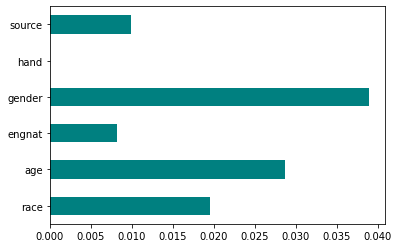

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X.iloc[:,:6],Y)
feat_importance = pd.Series(importance, dt1.columns[0: 6])
feat_importance.plot(kind='barh', color='teal')
plt.show()

In [ ]:
dt1.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'E1', 'E2', 'E3',
       'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3', 'N4', 'N5',
       'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10',
       'cluster'],
      dtype='object')

In [ ]:
dt1.drop(['race','engnat','hand', 'source'],axis=1,inplace=True)

In [ ]:
dt1

,age,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,53,1,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5,2
1,46,2,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2,3
2,14,2,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5,0
3,19,2,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5,0
4,25,2,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,15,2,1,4,3,5,4,3,1,2,1,5,5,3,5,3,4,5,4,4,4,4,5,5,1,5,1,5,1,1,5,5,3,2,5,3,3,3,4,3,4,4,1,3,5,3,4,1,4,2,5,3,3
19715,37,2,2,3,2,3,2,3,2,4,4,4,2,4,2,4,3,2,2,2,2,2,2,3,2,4,2,4,2,3,3,3,3,3,4,2,2,4,4,2,3,3,1,2,3,2,3,3,4,2,3,3,3
19716,16,1,2,5,4,5,5,5,1,2,1,5,5,1,5,1,5,5,5,5,5,5,4,3,5,2,5,5,2,4,1,3,2,5,5,5,4,5,1,4,1,5,5,3,1,3,4,1,1,5,5,5,4
19717,16,1,1,4,2,3,2,4,1,3,4,5,4,3,5,2,4,4,4,4,4,4,3,3,2,4,2,4,2,5,4,3,5,3,5,2,4,2,5,1,3,5,3,2,5,3,4,1,5,3,5,5,4


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(dt1.iloc[:,:-1])
scaled = scaler.transform(dt1.iloc[:,:-1])

In [ ]:
scaled

array([[-0.00712167, -1.23603798,  1.1123939 , ..., -0.95959447,
         0.88154815,  1.01172009],
       [-0.00712265,  0.76753234, -0.51027923, ..., -1.75394581,
        -1.15336528, -2.03797802],
       [-0.00712714,  0.76753234,  1.92373047, ...,  1.42345955,
         0.88154815,  1.01172009],
       ...,
       [-0.00712686, -1.23603798, -0.51027923, ...,  1.42345955,
         0.88154815,  1.01172009],
       [-0.00712686, -1.23603798, -1.32161579, ..., -0.16524313,
         0.88154815,  1.01172009],
       [-0.00712419, -1.23603798, -0.51027923, ...,  1.42345955,
         0.88154815,  1.01172009]])

In [ ]:
 column_names = ['age', 'gender', 'E1', 'E2', 'E3',
                    'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3', 'N4', 'N5',
                    'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
                    'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
                    'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10'
                    ]
df = pd.DataFrame(columns=column_names)

In [ ]:
df = pd.DataFrame(scaled)
df.to_csv('cluster_data_scaled.csv')
df.shape

(19719, 52)

In [ ]:
dt1['cluster'].to_csv('cluster_f.csv')


In [ ]:
l = dt1['cluster']
l.shape

(19719,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled, dt1['cluster'], test_size=0.33,random_state=5)

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
from sklearn import metrics 
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

96.40442532267977

Testing external input

In [ ]:
u1 = pd.read_csv('user_inputs.csv')
u1

,age,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,20,2,1,5,1,5,1,5,1,5,1,5,3,3,2,2,4,3,4,3,2,2,5,1,1,5,1,5,1,5,5,4,1,3,4,2,4,2,4,2,4,3,3,2,4,3,4,1,4,3,4,4
1,20,2,5,1,5,1,5,1,5,1,5,1,3,4,3,5,2,2,3,3,2,1,1,5,1,4,1,4,1,5,5,5,4,2,5,2,4,3,5,1,2,3,3,2,5,1,4,2,5,3,4,5
2,18,2,1,5,1,4,1,5,2,5,1,5,4,5,2,3,5,3,5,2,2,3,5,4,1,3,4,5,3,5,1,3,5,3,1,5,4,3,1,5,2,3,2,5,4,3,5,1,5,5,1,5
3,19,2,4,2,4,2,3,2,4,2,4,2,2,4,2,3,4,3,2,2,2,1,1,5,1,5,1,4,1,5,5,4,3,1,5,2,4,2,5,2,3,3,4,1,5,1,4,1,4,4,4,5


In [ ]:
y_pred_u1 = clf.predict(u1)
y_pred_u1

array([0, 2, 0, 2])

In [ ]:
import pickle
filename='model.pkl'
pickle.dump(clf, open(filename, 'wb'))